#####

<h1> About this Project </h1>

This dataset has been taken from the famous UCI Machine Learning Repository. The goal of this notebook is to accurately predict whether or not an adult makes more than 50000 US Dollars in an year on the basis of the feautures given.


<h3> Introduction </h3>

In this notebook, I will be using a Machine Learning Algorithm to implement the predictions.

<h3> a. Load the data in the tool. Briefly explain the dataset</h3>


In [4]:
import warnings
warnings.filterwarnings('ignore')

# ************** DATA MANIPULATION *****************

import pandas as pd
import numpy as np

# ************** DATA VISUALIZATION ****************

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression

# ************* METRICS ****************************

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook')



In [5]:
df = pd.read_csv('adult.csv')

<h3> About the Dataset </h3>

* **Age**: Describes the age of individuals. Continuous.
* **Workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **fnlwgt**: Continuous.
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **education-num**: Number of years spent in education. Continuous.
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **sex**: Female, Male.
* **capital-gain**: Continuous.
* **capital-loss**: Continuous.
* **hours-per-week**: Continuous.
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* **salary**: >50K,<=50K

<h3>c. Data wrangling/cleansing etc. Explain each step</h3>


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<h3> Observation: </h3>

* The dataset contains absolutely **no null values**!
* Age, Final Weight, Education Number, Capital Gain, Capital Loss and Hours Per Week are integer columns.
* There are no Float Datatypes in the dataset.
* Workclass, Education, Marital Status, Occupation, Relationship, Race, Sec, Native Country and Income are of object datatypes.
* Although the dataset does not contain any null values, a closer look (see cell 3) tells us that there are a lot of **'?'** values in our dataset. We will have to **replace** those values!

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


<h3> Observation: </h3>

* The minimum and maximum age of people in the dataset is 19 and 90 years respectively, while the average age is 37.
* The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.
* While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.
* The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

In [8]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<h3> Observation: </h3>

* We can see that the columns **workclass**, **occupation**, and **native.country** contains null values. We would have to find out a way to deal with them!
* There can be many ways to impute missing values, but right now, for the sake of simplicity we would impute them using **mode**!

In [9]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

<h3>b. Perform EDA using Python/R. Explain each step & d. Build multiple charts using Python/R. Explain observations</h3>


<h1> Exploratory Data Analysis </h1>

**Before beginning, let us understand a bit about our data.**
> Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10))
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

<h3> Observation: </h3>

In the EDA Section, I wanted to start by analysing our target variable first. We have come across a very obvious observation!

* The number of people earning more than **50K dollars** an year is one third of the people earning less than it.
* We should also keep in mind that this data was collected in **1996**, so 50K dollars of that tme, might not be the same in today's time!

In [11]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

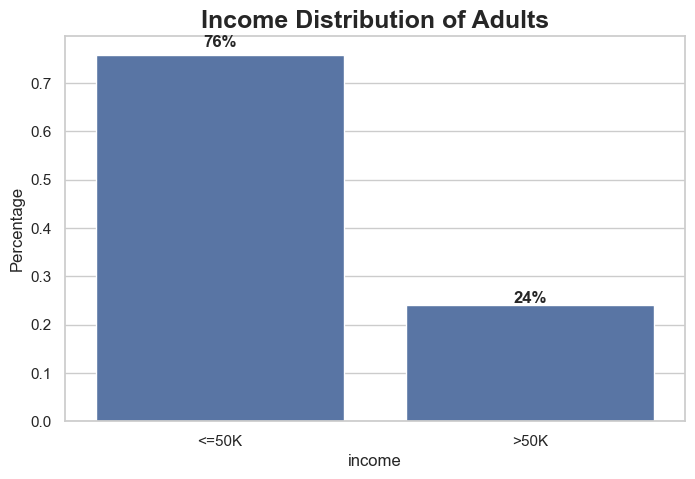

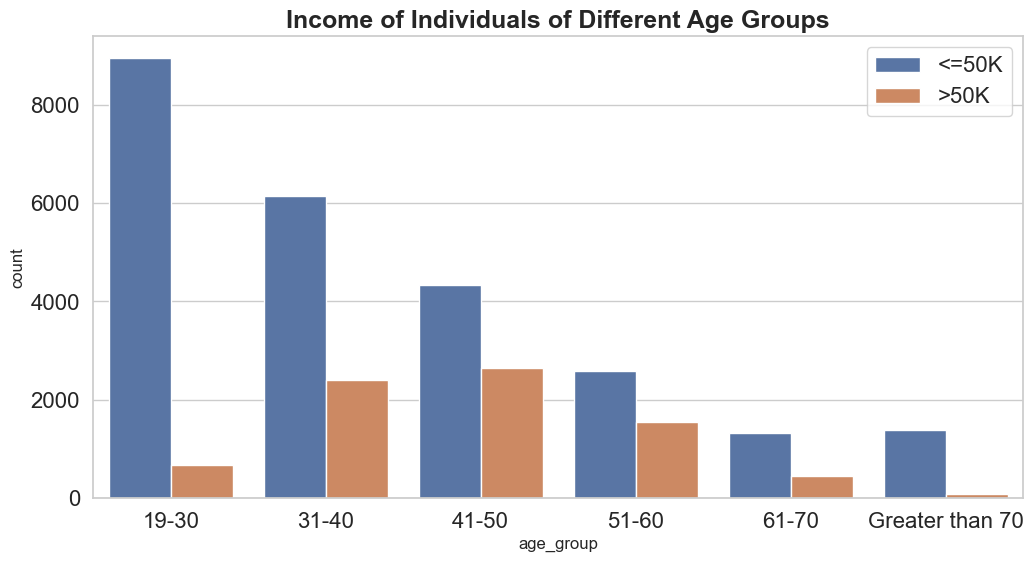

In [12]:
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']

sns.countplot(x='age_group', data=df, hue='income',
              order=order_list)

plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

<h3> Observation: </h3>

We make an interesting observation over here. We see that people earning more than 50K dollars increase as the age increases upto a certain extent.
* As one might imagine, the number of people earning more than **50K** is quite negligible amongst people of **age group 19-30**.
* For the people of age group **41-50** and **51-60**, the number of people earning **more than 50K** is quite comparable to those earning less than it!

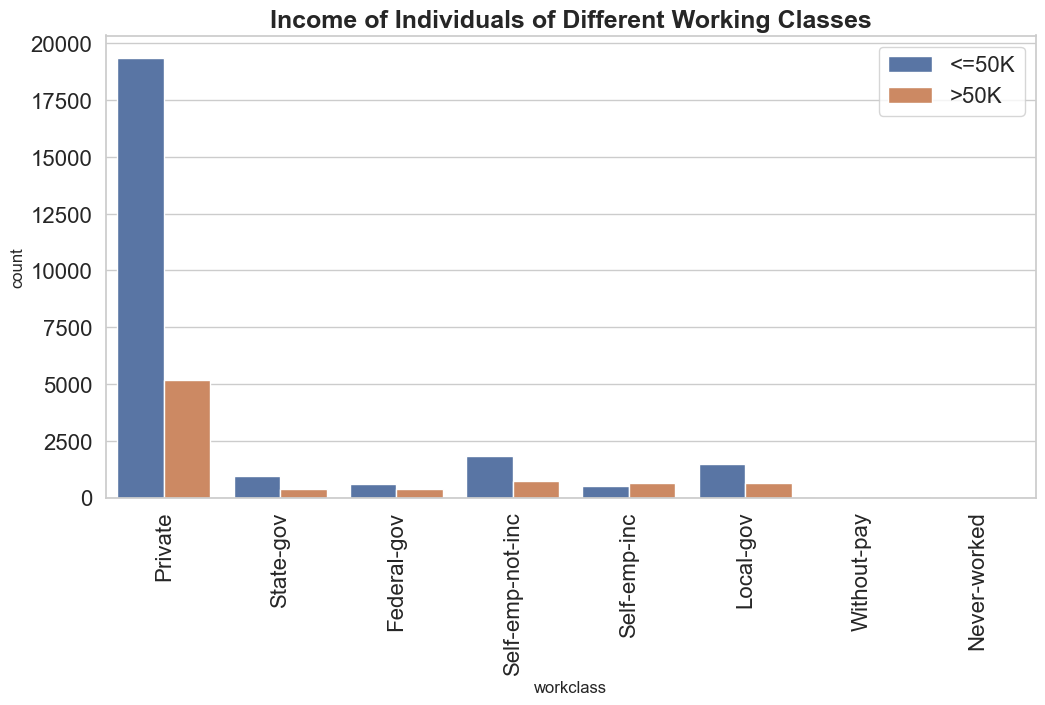

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x='workclass', data=df, hue='income')

plt.title('Income of Individuals of Different Working Classes', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

<h3> Observation: </h3>

In the above graph, we have segregated the incomes of adults on the basis of their different working classes.

* It is quite interesting to see that **Self-Employed** is the only category where the number of people who earn more than 50K dollars exceed those earning less than it! It might be conducive to suggest that when you handle your own business, start-up, etc. you are more likely to earn better if it gets successful!
* People working in the **Private Sector** face a significant difference between their pays where more than **75%** of them earn less than 50K dollars an year!
* There is a very minute difference between the number of people whose income is more or less than 50K dollars an year who work for the **Federal Govt.**
* People belonging to the category **Without-Pay** and **Never-Worked** hardly contain any data in both the categories.

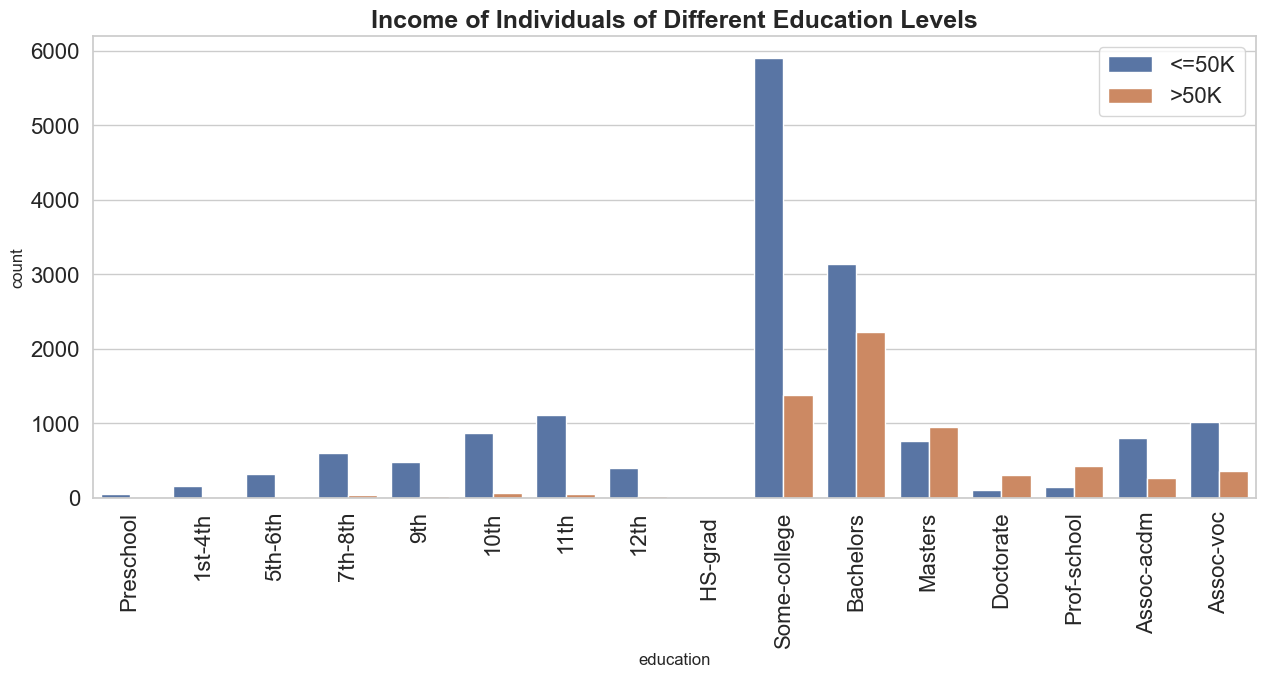

In [14]:
plt.figure(figsize=(15,6))
order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
              'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school',
              'Assoc-acdm', 'Assoc-voc']

sns.countplot(x='education', data=df, hue='income', order=order_list)

plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()


<h3> Observation: </h3>

We can draw a few insightful conclusions from this graph.

* For the people who have completed their **education up till 12th Standard**, there are just a handful of them who earn more than 50K dollars an year. Most of the people end up earning below 50K!
* For the people belonging to **Bachelors**, **Masters**, **Doctorate**, **Prof-school** category in the education level, there are more number of people who are earning greater than **50K** dollars an year than the number of people earning less than it.
* In case of **Assoc-acad** or **Assoc-voc**, there are a few people who earn more than **50K** dollars an year!

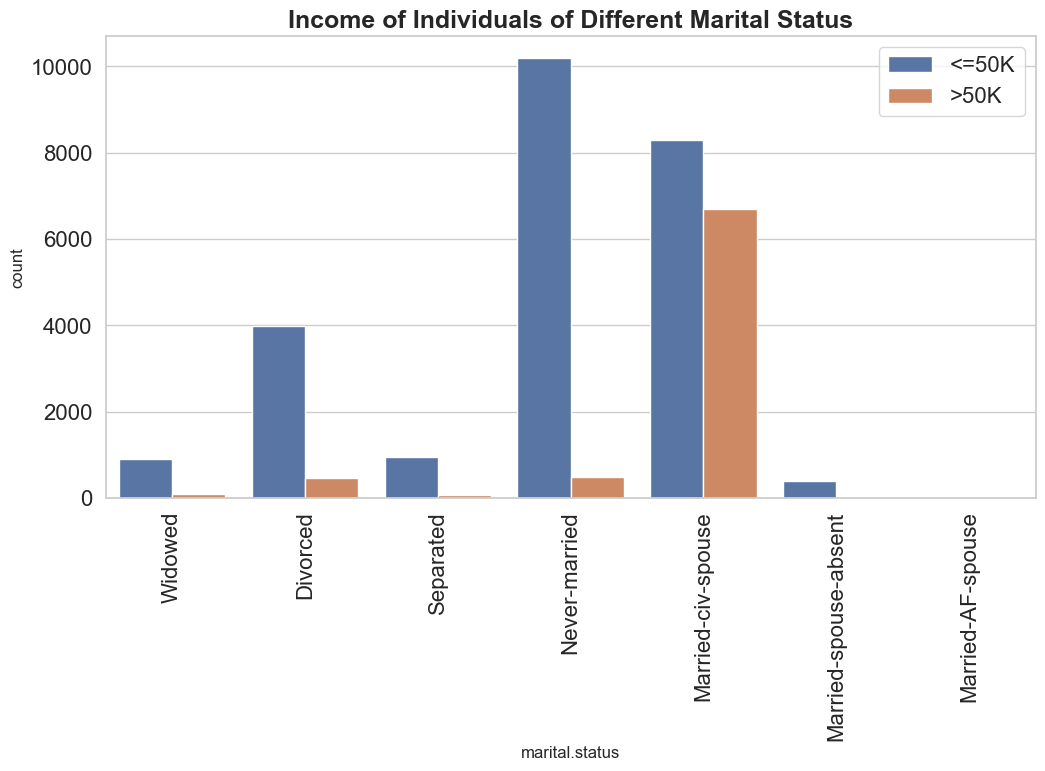

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x='marital.status', data=df, hue='income')

plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()


<h3> Observation: </h3>

* One thing to note here is that **Married-civ-spouse** is the only category which has comparable number of people belonging to both categories.
* For others, there are less than **25%** of the adults earning more than **50K** dollars an year.

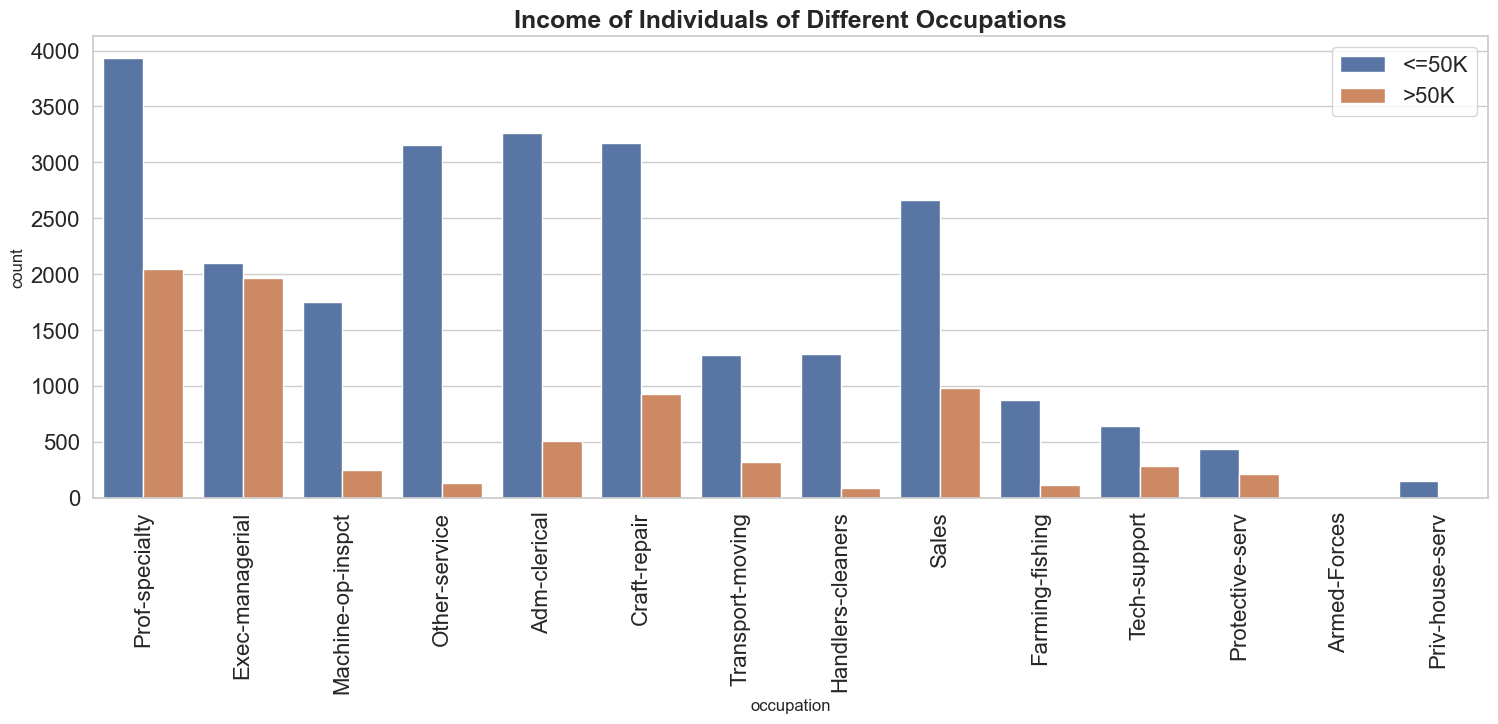

In [16]:
plt.figure(figsize=(18,6))
sns.countplot(x='occupation', data=df, hue='income')

plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()


<h3> Observation: </h3>

A few points to note over here:-

* Adults in **Exec-managerial** role are equally likely to earn more than **50K** dollars an year.
* There's close to **33%** probablity for an adult in **Prof-specialty** to earn more than **50K** dollars an year.
* Adults working in **Farming-fishing**, **Machine-op-inspect**, **Other-service**, **Adm-clerical**, **Transport-moving** are very less likely to earn more than **50K** dollars an year.
* Around **25%** of the people working in **Sales** earn more than **50K** dollars an year.

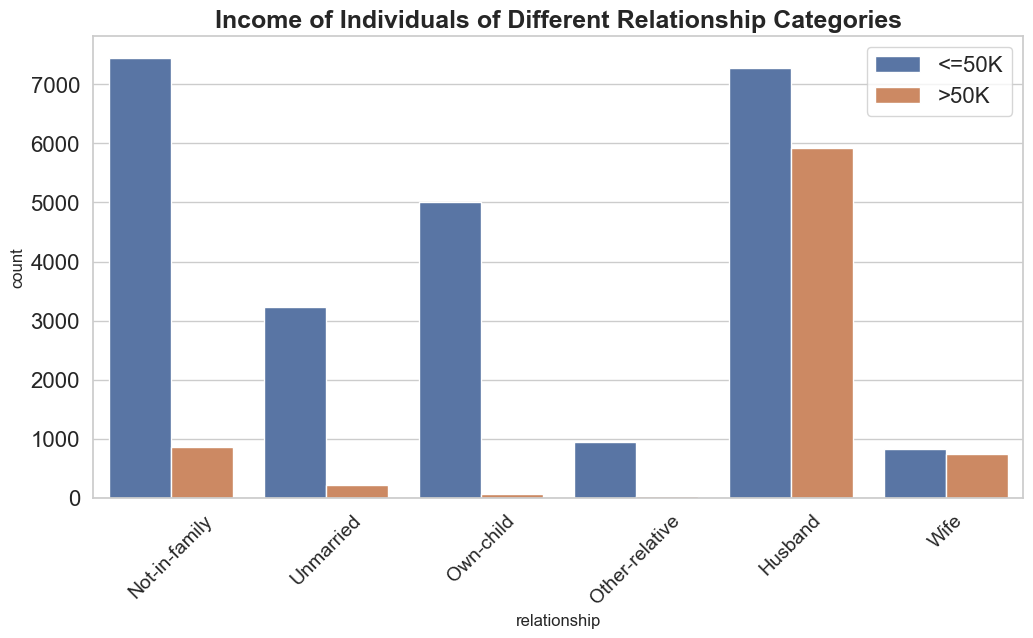

In [17]:
plt.figure(figsize=(12,6))

sns.countplot(x='relationship', data=df, hue='income')

plt.title('Income of Individuals of Different Relationship Categories', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()


<h3> Observation: </h3>

* **Wives** are equally likely to earn more than **50K** dollars an year.
* For **Husbands**, although significant, there is less possibility of them to earn more than **50K** dollars an year.
* There are just a handful of **Unmarried** people earning more than **50K** dollars an year.


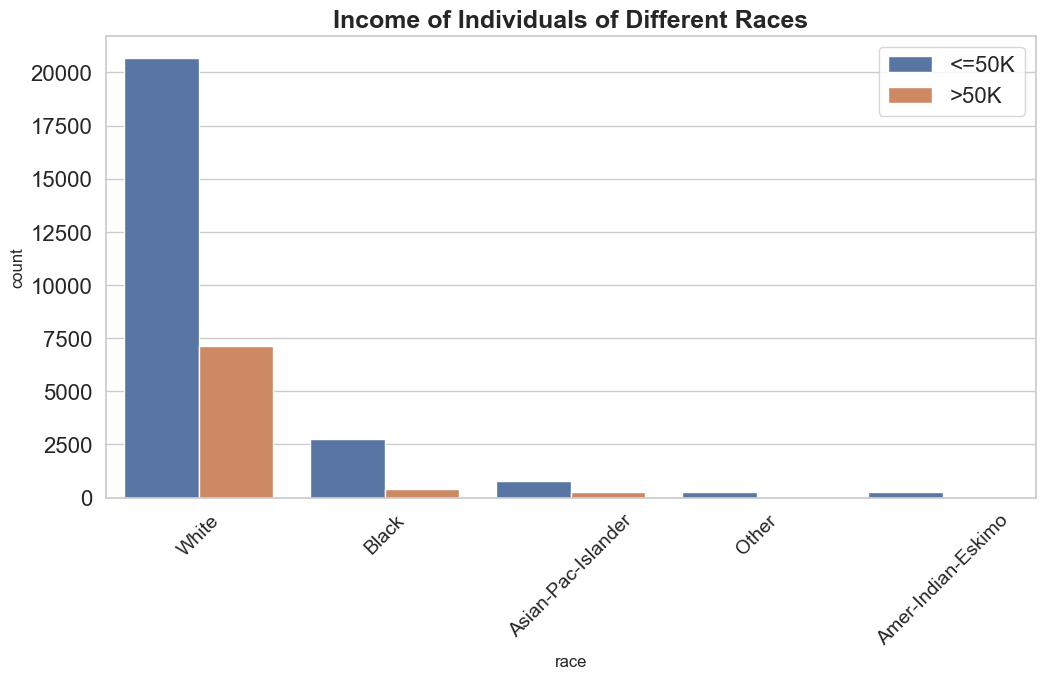

In [18]:
plt.figure(figsize=(12,6))

sns.countplot(x='race', data=df, hue='income')

plt.title('Income of Individuals of Different Races', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()


<h3> Observation: </h3>

An important point to notice over here is that, except **Whites** there are very few people of different races. Due to this one may fail to notice the exact percentage and relationship of people earning more than 50K dollars an year.

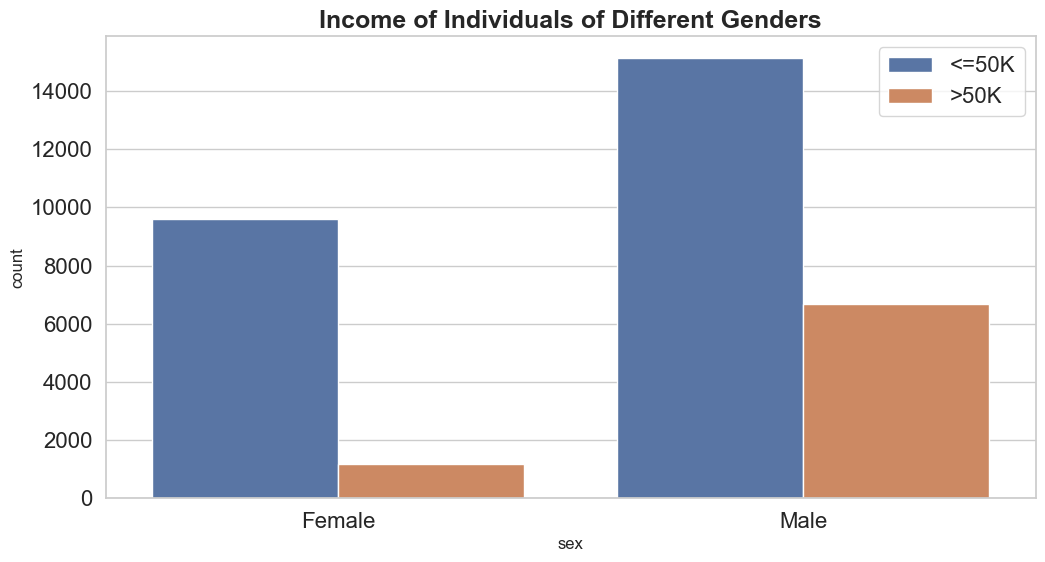

In [19]:
plt.figure(figsize=(12,6))

sns.countplot(x='sex', data=df, hue='income')

plt.title('Income of Individuals of Different Genders', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()


<h3> Observation: </h3>

We can see a significant gap in the earnings between males and females over here.

* For **Females**, there are less than **10%** of the adults earning more than **50K** dollars an year.
* In case of **Males** there are close to **33%** of them earning more than **50K** dollars an year.

In [20]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})


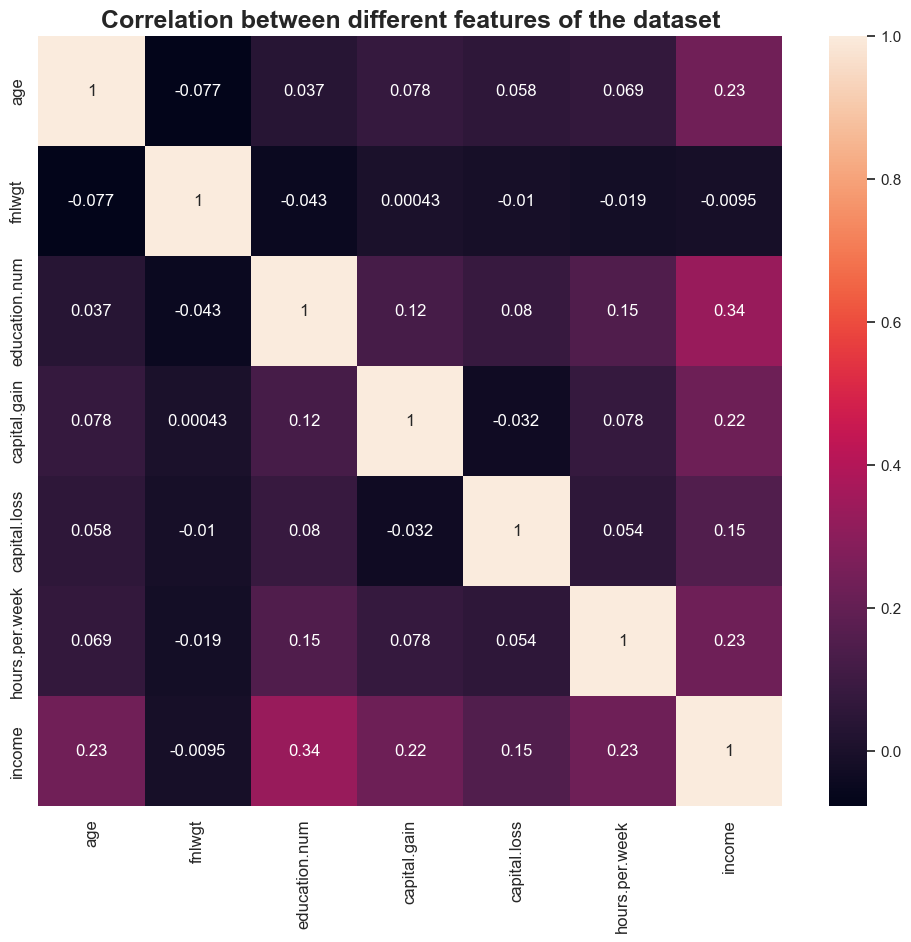

In [21]:
corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12,10))
plt.title("Correlation between different features of the dataset", fontsize=18, fontweight='bold')

sns.heatmap(corr,annot=True)

plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=90)
plt.show()


<h3> Observation: </h3>

Here, we have tried to plot a correlation map in order to see whether or not the independent features are related to the dependent features.

* We see that most of the features are positively correlated with the **Income Variable**.
* An important thing to note over here is that, we have not covered the object datatypes in this correlation graph.

In [22]:
#Distributing Age column in 3 significant parts and plotting it corresponding to the output feature(income)

#Combining the lower grades of education together

df.drop(['education.num'], axis = 1, inplace = True)
df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)

df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)



In [23]:
df.drop('age_group', inplace = True, axis = 1)

<h3>f. Use of ML techniques
</h3>


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -----------------------
# 1. SELECT FEATURES
# -----------------------
X = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
        'race', 'sex','native.country', 'age', 'fnlwgt',
        'capital.gain', 'capital.loss', 'hours.per.week']]

y = df['income']   # already mapped to 0/1 earlier

# -----------------------
# 2. ONE-HOT ENCODE CATEGORICAL VARIABLES
# -----------------------
X = pd.get_dummies(X, drop_first=True)

# -----------------------
# 3. TRAIN-TEST SPLIT
# -----------------------
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# -----------------------
# 4. STANDARDIZE NUMERIC FEATURES
# -----------------------
scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

# -----------------------
# 5. TRAIN LOGISTIC REGRESSION
# -----------------------
logreg = LogisticRegression(max_iter=500)
logreg.fit(x_train, y_train)

# -----------------------
# 6. PREDICTIONS
# -----------------------
y_pred = logreg.predict(x_test)

# -----------------------
# 7. PERFORMANCE METRICS
# -----------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8449175964786569

Confusion Matrix:
 [[6881  529]
 [ 986 1373]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      7410
           1       0.72      0.58      0.64      2359

    accuracy                           0.84      9769
   macro avg       0.80      0.76      0.77      9769
weighted avg       0.84      0.84      0.84      9769



<h3>e. Use of Git
</h3>

![commit](sc_1.png)
![pushed commits](sc_1.png)
![commits on github repository](sc_1.png)
